In [1]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

In [2]:
''' train and test path '''
train_path = pathlib.Path(r"C:\Users\SURESH A\Downloads\skin_cancer_Recognizer_using_DL\Train")
test_path = pathlib.Path(r'C:\Users\SURESH A\Downloads\skin_cancer_Recognizer_using_DL\Test')

In [3]:
''' length of train data '''
train_image_len = len(list(train_path.glob('*/*.jpg')))
print(train_image_len)

''' length of test data '''
test_image_len = len(list(test_path.glob('*/*.jpg')))
print(test_image_len)

1846
101


In [4]:
''' initializing some variables '''
batch_size = 32
img_h = 180
img_w = 180

In [5]:
''' data augmentation '''
''' using 80-20 split of data, 80% for training and 20% for validation '''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_h, img_w),
    batch_size = batch_size)

Found 1846 files belonging to 9 classes.
Using 1477 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_h, img_w),
    batch_size = batch_size
)

Found 1846 files belonging to 9 classes.
Using 369 files for validation.


In [7]:
''' classes names '''
c_names = train_ds.class_names
print(c_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


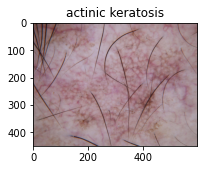

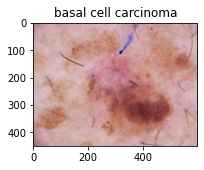

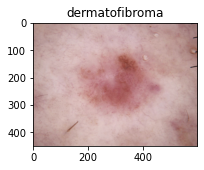

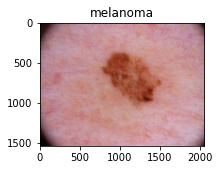

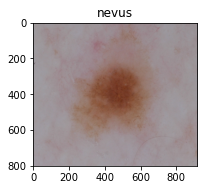

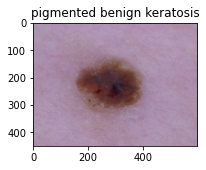

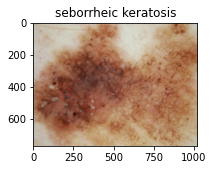

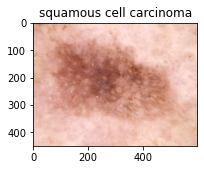

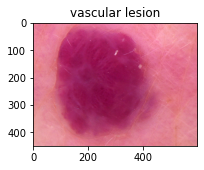

In [8]:
''' plotting some images '''
for i in range(9): 
    plt.figure(figsize=(10,10))
    plt.subplot(3, 3, i + 1)
    image = mpimg.imread(str(list(train_path.glob(c_names[i]+'/*.jpg'))[1]))
    #img = mpimg.imread(str(list(train_path.glob('*/*.jpg'))[1]))
    #img = mpimg.imread(str(list(train_ds.glob(c_names[i]+'/*.jpg'))[1]))
    plt.title(c_names[i])
    plt.imshow(image)

In [9]:
''' AUTOTUNE '''
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
''' Model '''
n_c = 9

''' preprocessing layer '''
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255 , input_shape=(img_h,img_w,3))])

''' Convolutional Layers '''
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
model.add(Dropout(0.25))
model.add(Flatten())

''' Classification Layer'''
model.add(Dense(n_c, activation = "softmax"))

In [11]:
''' Compile the model '''
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
''' lets see how looks like '''
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        2

In [13]:
''' training '''
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10


C:\Users\SURESH A\pythonjsk\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


47/47 [==============================] - 171s 4s/step - loss: 2.0569 - accuracy: 0.1997 - val_loss: 1.9897 - val_accuracy: 0.2222
Epoch 2/10
47/47 [==============================] - 165s 4s/step - loss: 2.0072 - accuracy: 0.2451 - val_loss: 2.0486 - val_accuracy: 0.2764
Epoch 3/10
47/47 [==============================] - 161s 3s/step - loss: 2.0380 - accuracy: 0.2309 - val_loss: 1.9982 - val_accuracy: 0.2222
Epoch 4/10
47/47 [==============================] - 169s 4s/step - loss: 2.0239 - accuracy: 0.2241 - val_loss: 1.9984 - val_accuracy: 0.2249
Epoch 5/10
47/47 [==============================] - 178s 4s/step - loss: 2.0164 - accuracy: 0.2187 - val_loss: 1.9960 - val_accuracy: 0.2222
Epoch 6/10
47/47 [==============================] - 152s 3s/step - loss: 2.0178 - accuracy: 0.2180 - val_loss: 1.9922 - val_accuracy: 0.2222
Epoch 7/10
47/47 [==============================] - 149s 3s/step - loss: 2.0188 - accuracy: 0.2133 - val_loss: 1.9920 - val_accuracy: 0.2222
Epoch 8/10
47/47 [======

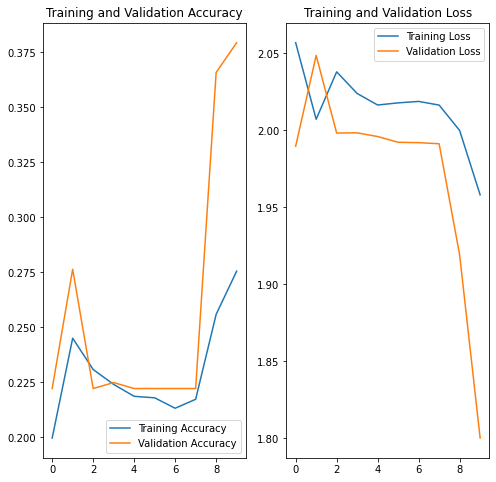

In [14]:
''' plotting training accuracy and validation accuracy graph '''
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
''' augmentation '''
augmentation = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", 
                                                                          input_shape=(img_h,img_w,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), 
                                                                          width_factor=(0.2, 0.3), fill_mode='reflect')])

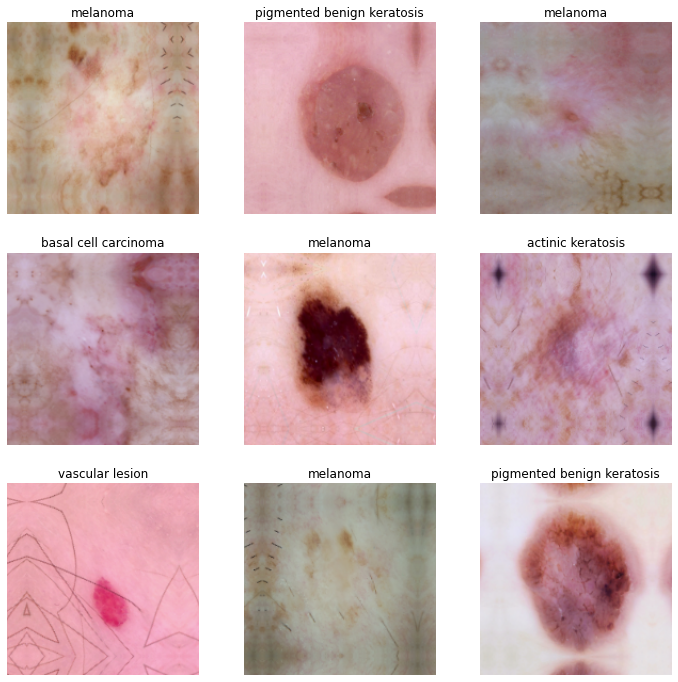

In [16]:
''' ploting some augmented images '''
for img, lbls in train_ds.take(1):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmentation(img)[i].numpy().astype("uint8"))
        plt.title(c_names[lbls[i]])
        plt.axis("off")

In [17]:
''' Model with Augmentation '''
n_classes = 9

''' preprocess layer '''
model = Sequential([augmentation, layers.experimental.preprocessing.Rescaling(1./255, 
                                                                              input_shape=(img_h, img_w,3))])
''' Convolutional layers '''
model.add(Conv2D(filters = 32, kernel_size=(5,5), padding='Same',  activation ='relu', input_shape=(180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size=(5,5),padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
model.add(Dropout(0.25))
model.add(Flatten())

''' classification layer '''
model.add(Dense(n_classes, activation = "softmax"))


In [18]:
''' compile the model '''
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
''' training '''
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
47/47 [==============================] - 164s 3s/step - loss: 2.0681 - accuracy: 0.2200 - val_loss: 1.9995 - val_accuracy: 0.2195
Epoch 2/10
47/47 [==============================] - 157s 3s/step - loss: 1.9880 - accuracy: 0.2552 - val_loss: 1.9194 - val_accuracy: 0.2900
Epoch 3/10
47/47 [==============================] - 157s 3s/step - loss: 2.0324 - accuracy: 0.2309 - val_loss: 2.0013 - val_accuracy: 0.2222
Epoch 4/10
47/47 [==============================] - 155s 3s/step - loss: 2.0240 - accuracy: 0.2119 - val_loss: 1.9966 - val_accuracy: 0.2222
Epoch 5/10
47/47 [==============================] - 154s 3s/step - loss: 2.0221 - accuracy: 0.2207 - val_loss: 2.0027 - val_accuracy: 0.2222
Epoch 6/10
47/47 [==============================] - 153s 3s/step - loss: 2.0188 - accuracy: 0.2187 - val_loss: 1.9954 - val_accuracy: 0.2222
Epoch 7/10
47/47 [==============================] - 152s 3s/step - loss: 2.0184 - accuracy: 0.2194 - val_loss: 1.9901 - val_accuracy: 0.2222
Epoch 8/10
47

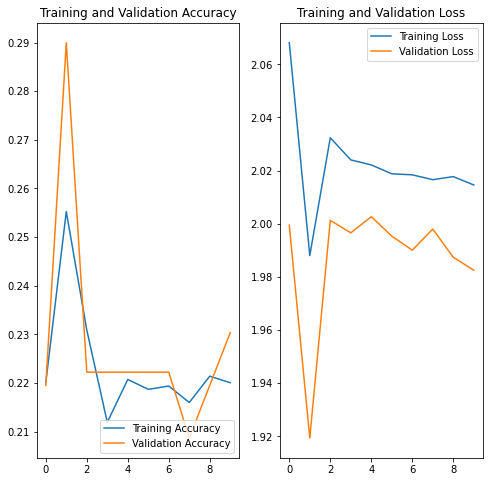

In [20]:
''' plotting training accuracy and validation accuracy graph '''
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
p_list=[]
l_list=[]
for i in c_names:
    for j in train_path.glob(i+'/*.jpg'):
        p_list.append(str(j))
        l_list.append(i)
        
df_dict = dict(zip(p_list, l_list))
org_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])
org_df

,Path,Label
0,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,actinic keratosis
1,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,actinic keratosis
2,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,actinic keratosis
3,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,actinic keratosis
4,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,actinic keratosis
...,...,...
1841,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,vascular lesion
1842,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,vascular lesion
1843,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,vascular lesion
1844,C:\Users\SURESH A\Downloads\skin_cancer_Recogn...,vascular lesion


<BarContainer object of 9 artists>

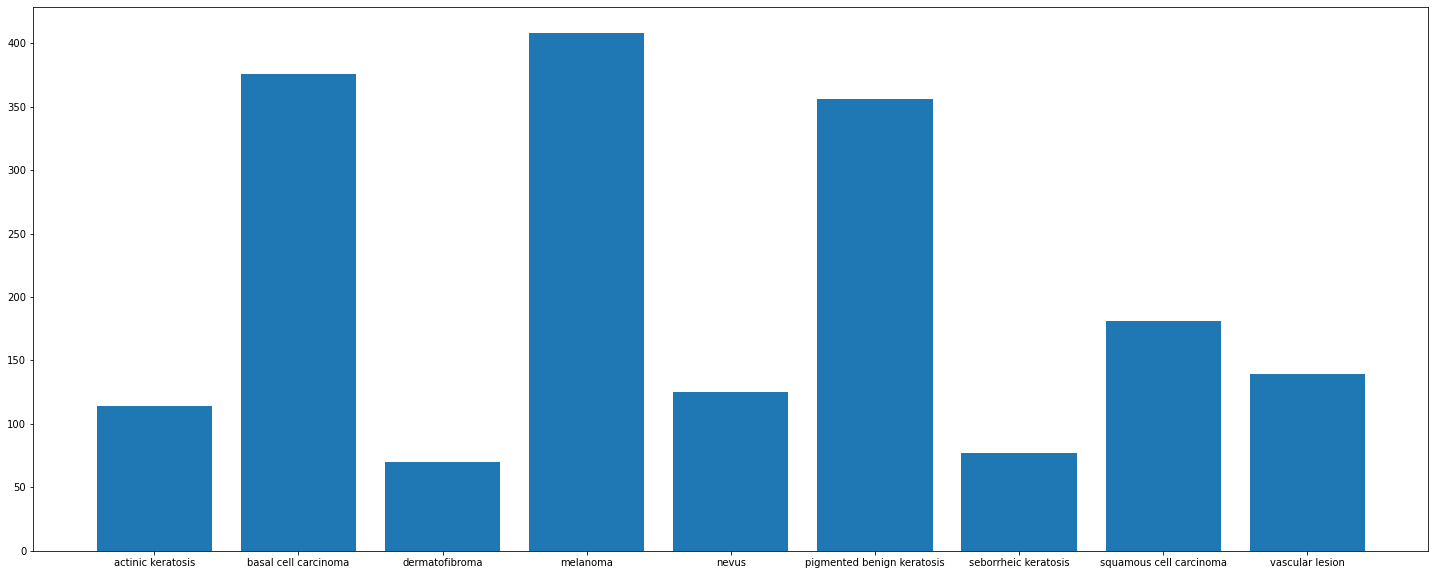

In [24]:
''' barplot '''
count=[]
for i in c_names:
    count.append(len(list(train_path.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(c_names,count)